In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# IMPORT FINAL CROSSVAL PREDICTIONS WITHOUT META
mal_cv_file = pd.read_csv('MalFinal.csv').rename({'target':'Mal'},axis=1)
phil_cv_file = pd.read_csv('PhilFinal.csv').rename({'target':'Phil'},axis=1)

In [3]:
# DATAFRAME WITH CHOSEN FILES
ensemble = mal_cv_file.merge(phil_cv_file,on='image_name',how='left')

In [4]:
ensemble.head()

,image_name,Mal,Phil
0,ISIC_0052060,2.090000e-06,0.044477
1,ISIC_0052349,1.250000e-06,0.016621
2,ISIC_0058510,2.510000e-12,0.022108
3,ISIC_0073313,1.610000e-10,0.024376
4,ISIC_0073502,1.540274e-03,0.035600


In [5]:
ensemble['Mal'].mean()

0.06467340877503101

In [6]:
ensemble['Phil'].mean()

0.11865202826058123

In [7]:
ensemble.corr()

,Mal,Phil
Mal,1.000000,0.520154
Phil,0.520154,1.000000


In [8]:
# ASSIGN GROUPINGS AND WEIGHTINGS
M = 50
P = 50

In [13]:
ensemble['target']=(1/2*ensemble.Mal
                    +1/2*ensemble.Phil)
    
ensemble.head(5)

,image_name,Mal,Phil,target
0,ISIC_0052060,2.090000e-06,0.044477,0.022240
1,ISIC_0052349,1.250000e-06,0.016621,0.008311
2,ISIC_0058510,2.510000e-12,0.022108,0.011054
3,ISIC_0073313,1.610000e-10,0.024376,0.012188
4,ISIC_0073502,1.540274e-03,0.035600,0.018570


In [14]:
(0.00154+0.0356)/2

0.01857

In [15]:
ensemble.sort_values(by=['image_name'], ascending=True, inplace=True)
ensemble_sub = ensemble[['image_name','target']]
ensemble_sub.head()

,image_name,target
0,ISIC_0052060,0.022240
1,ISIC_0052349,0.008311
2,ISIC_0058510,0.011054
3,ISIC_0073313,0.012188
4,ISIC_0073502,0.018570


In [16]:
ensemble_sub.to_csv('ENSEMBLE_FINAL_JOINT.csv',index=False)

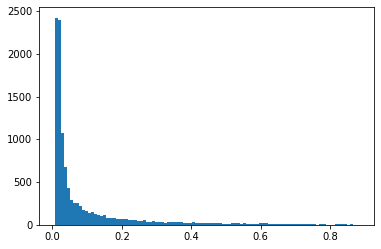

In [17]:
# PLOT DISTRIBUTION WITH META
plt.hist(ensemble_sub.target,bins=100)
plt.show()